# **Twitter Sentiment Analysis**

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/6740/logos/front_page.png" title="Title text" />

## Problem Statement 🙃
**Identify if the sentiment towards the various tech companies from the tweets given to those companies**

![](https://greengroundswell.com/wordpress/wp-content/uploads/2015/03/Yellow-Happy-Face-Ball-Among-Blue-Sad-Face-Balls.jpg)

### Understanding the Problem🕵🏻‍♂️
**There are several tweets given from the customers towards the various tech firms who are the manufacturers of mobiles, laptops and other gadgets etc., We have been given two datasets named Train and Test in which train already have the classified labeling to the tweets as'0' for positive sentiment and '1' for negative sentiment while test don't. Task is to use the data and identify negative and positive tweets in the test data**

### **Import the libraries and the data**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

In [3]:
cd "E:\Analytics Vidya\Twitter sentiment analysis\Sentiment towards companies negative and positive tweets from customers"

E:\Analytics Vidya\Twitter sentiment analysis\Sentiment towards companies negative and positive tweets from customers


In [4]:
Train= pd.read_csv("train_data.csv")
Test = pd.read_csv("test_data.csv")

**Combining both the data as cleaning all the texts at a time will reduce the amount of time to again clean the test data**

In [5]:
df = Train.append(Test,ignore_index=True)
df = df[['tweet','label']]

C:\Users\Rithin\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


**First, Let us check and inspect the data**

In [6]:
Train.shape,Test.shape 

((7920, 3), (1953, 2))

In [7]:
Train['label'].value_counts() 

0    5894
1    2026
Name: label, dtype: int64

We see that There are 7920 tweets in the train data while 1953 tweets in the test where we need to identify the sentiments to the 1953 tweets in the test data. 
Also, we can see that out of 7920 tweets in the train data 5894(~74%) of the tweets are positive and 2016(~26%) are negative from which we can assume to an extent that people are a bit positive towards these companies. Well, this is just assumption from the given data. Now, Lets continue with our problem solving

## Text  Pre-Processing

**Understanding the tweets pattern by having a glance at it**

In [9]:
pd.set_option('display.max_colwidth', 1000)

In [10]:
df.loc[10:15, ['tweet','label']]

,tweet,label
10,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.,1.0
11,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade,1.0
12,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo,1.0
13,"I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/",0.0
14,@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.,1.0
15,From #DeepEllum towards #downtown #Dallas. #BigD #Saturday #RX100M3 #Sony #summer #urban http://instagram.com/p/pzJoOaQqZ4/,0.0


We can see that there are lot of unwanted texts or words to be cleaned like urls, twitter handles etc.,

In [11]:
df['tweet'][18]

"The reason I don't have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic.twitter.com/zpggd7caZN"

We can see from the above one of the tweets that hashtag words might add up to value in predicting the sentiment as "#suck" in the above represents negative word. So let us include the hashtag words for now and see further how much impact does this have.

### Five steps performed to clean to maximum extent
1. Slicing the unvalued words
2. Tokenizing the words into vector of words
3. Stemming to reduce the word to its stem word without suffix and prefix or normalizing the text
4. Removing the stopwords which are grammatical words that does not add value in analysis
5. Sorting the vector with only unique words in it and joining back as texts

Packages and modules used for performing these operations were

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

I constructed the below loop to go through all the uncleaned tweets and perform the above operations all at once and store the tweets in a separate array named "Clean_tweets" to finally link it to the combined data as a new variable  

In [13]:
Clean_tweets = []
for i in range(0, 9873):
    Tweet = df['tweet'][i]
#Since "$&@*#" denote most profane and vulgar terms So, lets include this word by replacing with "Vulgar" for the model  
    Tweet = Tweet.replace("$&@*#","Vulgar")
#Removing all the twitter handles, urls, punctuations and special characters etc., which do not add up to value in analysis
    Tweet =re.sub('(@[\w]+)|(\S+\.\S+\s?)|(http\S+)|[^a-zA-Z#]',' ',Tweet)
#Converting all the text to lower case    
    Tweet = Tweet.lower()
#Tokenizing the tweets into list of words
    Tweet = Tweet.split()
#Stemming or removing all the suffix to keep only root words 
    ps = PorterStemmer()
    Tweet = [ps.stem(word) for word in Tweet if not word in set(stopwords.words('english'))]
#Removing repeated words and including only unique set of words in the text    
    Tweet = ' '.join(sorted(set(Tweet),key= Tweet.index))
    Clean_tweets.append(Tweet)

In [86]:
df['Cleaned_tweets'] = Clean_tweets

Let's see the cleaned tweets

In [15]:
df.head(7)

,tweet,label,Cleaned_tweets
0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,0.0,#fingerprint #pregnanc test #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon
1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,0.0,final transpar silicon case thank uncl #yay #soni #xperia #s #sonyexperia
2,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,0.0,love would go #talk #makememori #unplug #relax #iphon #smartphon #wifi
3,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,0.0,wire know georg made way #iphon #cute #daventri #home
4,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,1.0,amaz servic appl even talk me question unless pay stupid support
5,iPhone software update fucked up my phone big time Stupid iPhones,1.0,iphon softwar updat fuck phone big time stupid
6,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,0.0,happi us #instap #instadaili #u #soni #xperia #xperiaz


## Words Visualization 

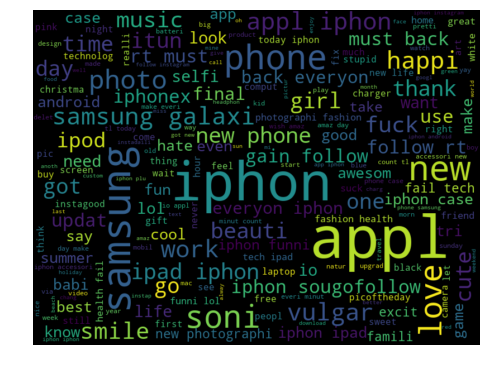

In [88]:
from wordcloud import WordCloud

#All the words
Complete_words = ' '.join([word for word in df['Cleaned_tweets']])
wordcloud = WordCloud(width=800, height=600, random_state=0, max_font_size=105).generate(Complete_words)

plt.figure(figsize=(8, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that most of the frequent words contain manufacturer names which does not add up to value for the analysis. So let us refine more by removing some of it

In [89]:
Overall_freq = pd.Series(' '.join(df['Cleaned_tweets']).split()).value_counts()[:3]
Overall_freq

#iphon      3804
#appl       2653
#samsung    1583
dtype: int64

In [90]:
Overall_freq = list(Overall_freq.index)
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if x not in Overall_freq]))

In [91]:
Overall_freq1 = pd.Series(' '.join(df['Cleaned_tweets']).split()).value_counts()[12:19]
Overall_freq1

day           433
#android      409
#life         381
rt            378
#me           375
#cute         367
#instagram    367
dtype: int64

In [92]:
Overall_freq1 = list(Overall_freq1.index)
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if x not in Overall_freq1]))

In [93]:
Least_freq = pd.Series(' '.join(df['Cleaned_tweets']).split()).value_counts()[-20:]
Least_freq

#hydrat                    1
#stillwontbuyandroidtho    1
#retrocollect              1
#bobevan                   1
chieftanc                  1
#bioshock                  1
#ournewtoy                 1
#shitservic                1
#wagon                     1
#boardgam                  1
#stayposit                 1
#creatur                   1
#fettish                   1
#retail                    1
#sunflow                   1
#queend                    1
#ax                        1
lego                       1
#bestofday                 1
#blaze                     1
dtype: int64

We can see that all the least frequent words does not look like add up value in predicting the sentiments. So, lets remove these

In [94]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if x not in Least_freq]))

Now let us visualize the frequent words

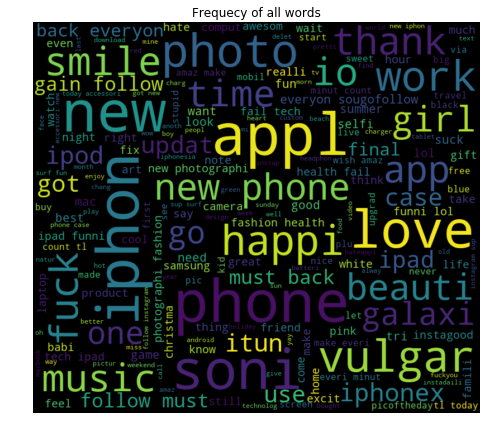

In [95]:
Complete_words = ' '.join([word for word in df['Cleaned_tweets']])
wordcloud = WordCloud(width = 800,height = 700,random_state = 0,max_font_size=105 ).generate(Complete_words)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Frequecy of all words')
plt.axis('off')
plt.show()

Now this looks pretty good with relavant frequent words

Now lets visualize negative and positive frequent words similarly

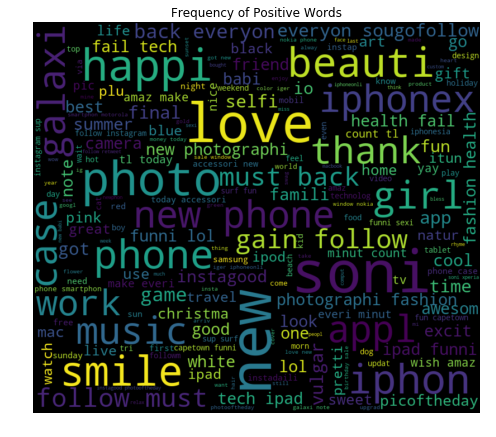

In [96]:
Positive_words = ' '.join([word for word in df['Cleaned_tweets'][df['label']==0]])

wordcloud_p = WordCloud(width = 800,height = 700,random_state=0,max_font_size = 105).generate(Positive_words)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud_p,interpolation = 'bilinear')
plt.title('Frequency of Positive Words')
plt.axis('off')
plt.show()

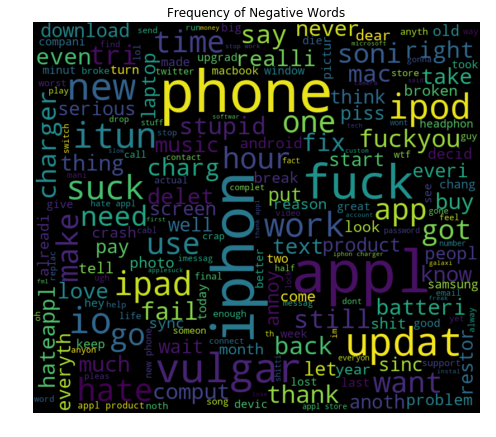

In [98]:
Negative_words = ' '.join([word for word in df['Cleaned_tweets'][df['label']==1]])

wordcloud_n = WordCloud(width = 800,height = 700,random_state=0,max_font_size = 105).generate(Negative_words)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud_n,interpolation = 'bilinear')
plt.title('Frequency of Negative Words')
plt.axis('off')
plt.show()

In [99]:
def collect_hashtags(x):
    Hashtags =[]
    for i in x:
        HT =re.findall(r'#(\w+)',i)
        Hashtags.append(HT)
    return Hashtags;

In [100]:
all_hashtags = collect_hashtags(df['Cleaned_tweets'])
Positive_hashtags = collect_hashtags(df['Cleaned_tweets'][df['label']==0])
Negative_hashtags = collect_hashtags(df['Cleaned_tweets'][df['label']==1])

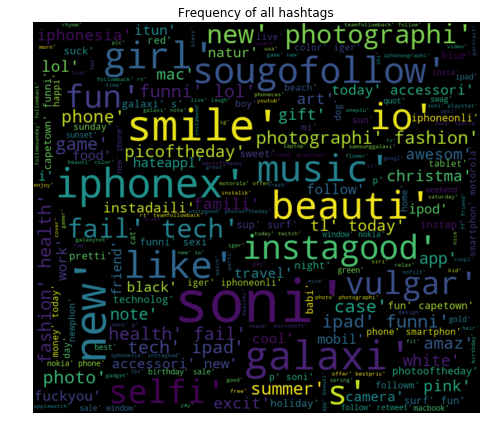

In [107]:
all_hashtags = ' '.join(map(str,[all_hashtags]))
wordcloud_ht = WordCloud(width = 800,height = 700,random_state=0,max_font_size=105).generate(all_hashtags)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud_ht,interpolation ='bilinear')
plt.title('Frequency of all hashtags')
plt.axis('off')
plt.show()

In [115]:
high_freq = pd.Series(all_hashtags.split()).value_counts()[1:4]
high_freq

'soni',           610
'ipad',           336
'photographi',    284
dtype: int64

In [103]:
Least_freq_ht = pd.Series(all_hashtags.split()).value_counts()[-10:]
Least_freq_ht

'whereitsat'],        1
'blahh',              1
'pout',               1
'pencil',             1
['wantmi'],           1
'sfo',                1
'punk',               1
['netbook'],          1
'fotosencozumel'],    1
['poli',              1
dtype: int64

We can see that top most frequent and least freq hashtag words does not add up to value in analysis. Let us remove and join

In [104]:
high_freq = list(high_freq.index)
Least_freq_ht = list(Least_freq_ht.index)
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if x not in high_freq]))
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if x not in Least_freq_ht]))

 Now let's check the frequent words of positive and negative hashtags and see whether to include hashtag words to add up value or not 

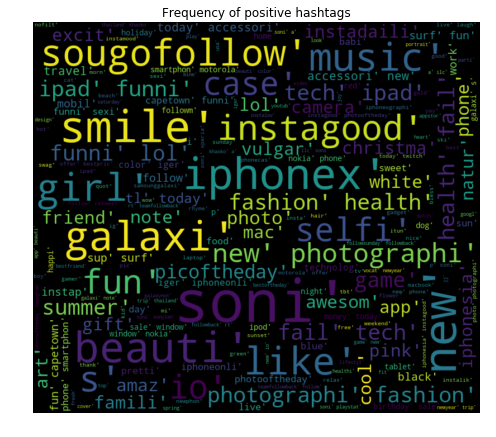

In [108]:
Positive_hashtags = ' '.join(map(str,[Positive_hashtags]))
wordcloud_ph = WordCloud(width = 800,height = 700,random_state=0,max_font_size=105).generate(Positive_hashtags)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud_ph,interpolation ='bilinear')
plt.title('Frequency of positive hashtags')
plt.axis('off')
plt.show()

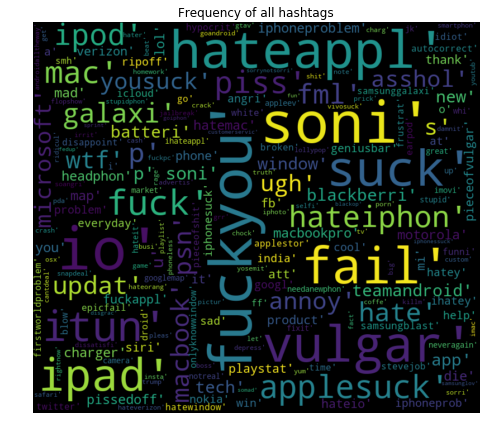

In [109]:
Negative_hashtags = ' '.join(map(str,[Negative_hashtags]))
wordcloud_nh = WordCloud(width = 800,height = 700,random_state=0,max_font_size=105).generate(Negative_hashtags)

plt.figure(figsize=(8,9))
plt.imshow(wordcloud_nh,interpolation ='bilinear')
plt.title('Frequency of all hashtags')
plt.axis('off')
plt.show()

Now let's unnest and see the frequency distribution of these words separately 

  Lets first convert the string forms to list and then unnest

In [137]:
Positive_hashtags = collect_hashtags(df['Cleaned_tweets'][df['label']==0])
Negative_hashtags = collect_hashtags(df['Cleaned_tweets'][df['label']==1])
P_hashtags = sum(Positive_hashtags,[])
N_hashtags = sum(Negative_hashtags,[])

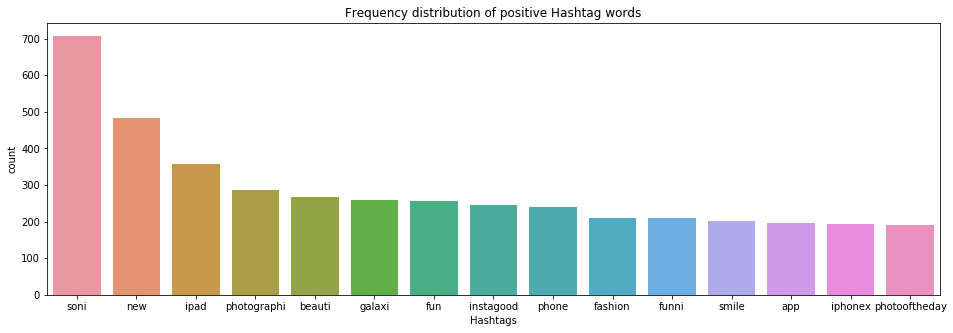

In [136]:
P = nltk.FreqDist(P_hashtags)
d1 = pd.DataFrame({'Hashtags': list(P.keys()),
                  'Count': list(P.values())})
d1 = d1.nlargest(columns = 'Count',n=15)
plt.figure(figsize=(16,5))
plt.title('Frequency distribution of positive Hashtag words')
ax1 = sns.barplot(data=d1,x='Hashtags',y = 'Count')
ax1.set(ylabel = 'count')
plt.show()

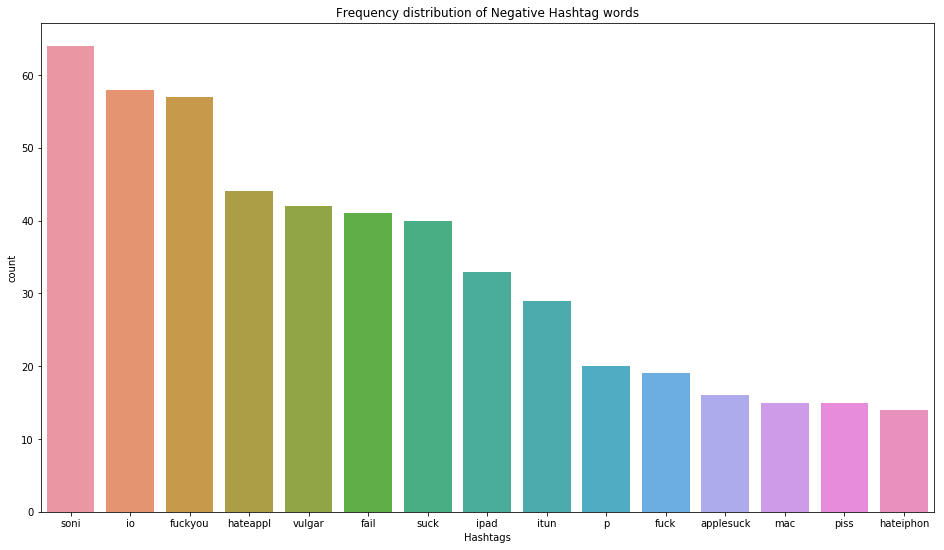

In [139]:
N = nltk.FreqDist(N_hashtags)
d2 = pd.DataFrame({'Hashtags': list(N.keys()),
                  'Count': list(N.values())})
d2 = d2.nlargest(columns = 'Count',n = 15)
plt.figure(figsize=(16,9))
plt.title('Frequency distribution of Negative Hashtag words')
ax2 = sns.barplot(data = d2,x = 'Hashtags',y = 'Count')
ax2.set(ylabel = 'count')
plt.show()

We can see that it makes sense to include the hashtags. Now let us remove '#' and include only words attached to it

In [141]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: re.sub('[#]','',x))

In [144]:
df.drop(columns='Cleaned_Tweets',inplace=True)

In [145]:
df.head(7)

,tweet,label,Cleaned_tweets
0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,0.0,fingerprint pregnanc test app beauti health iger iphoneonli iphonesia
1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,0.0,final transpar silicon case thank uncl yay soni xperia s sonyexperia
2,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,0.0,love would go talk makememori unplug relax smartphon wifi
3,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,0.0,wire know georg made way daventri home
4,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,1.0,amaz servic appl even talk me question unless pay stupid support
5,iPhone software update fucked up my phone big time Stupid iPhones,1.0,iphon softwar updat fuck phone big time stupid
6,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,0.0,happi us instap instadaili u soni xperia xperiaz


In [142]:
df['Cleaned_tweets'][1], df['Cleaned_tweets'][6]

('final transpar silicon case thank uncl yay soni xperia s sonyexperia',
 'happi us instap instadaili u soni xperia xperiaz')

There is still last part to clean up. We can see that there are some single letters like 'u' and 's' in the above tweets left out that can be removed. So let us do that and complete the cleaning 

In [146]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: ' '.join([x for x in x.split() if len(x)>1]))

In [148]:
df['Cleaned_tweets'][1], df['Cleaned_tweets'][6]

('final transpar silicon case thank uncl yay soni xperia sonyexperia',
 'happi us instap instadaili soni xperia xperiaz')

In [149]:
df.head()

,tweet,label,Cleaned_tweets
0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,0.0,fingerprint pregnanc test app beauti health iger iphoneonli iphonesia
1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,0.0,final transpar silicon case thank uncl yay soni xperia sonyexperia
2,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,0.0,love would go talk makememori unplug relax smartphon wifi
3,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,0.0,wire know georg made way daventri home
4,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,1.0,amaz servic appl even talk me question unless pay stupid support


☝🏻✔☝🏻Now we can see that every tweet is cleaned above are some of our final cleaned tweets☝🏻✔☝🏻

We all know that this is predicting the sentiments, let us see numerically the sentiment value and average word lengths of our final cleaned tweets to have an idea on how the sentiments are detected. Also, let us add these two features to our model as well to let the model to train with more knowledge.

For this there is wonderful package that does the work in python which TextBlob. Lets use it 

In [150]:
from textblob import TextBlob 
df['Sentiment'] = df['Cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment[0])

In [151]:
length = []
for i in range(0,9873):
    wl = df['Cleaned_tweets'][i].split()
    wl = sum(len(word) for word in wl)/len(wl)
    length.append(wl);

In [152]:
df['Average_word_length'] = length

In [154]:
df.drop(columns = 'tweet',inplace = True)

Now let's have a look at our final dataframe

In [157]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: round(x,3))
df['Average_word_length'] = df['Average_word_length'].apply(lambda x: round(x,3))
df.head(10)

,label,Cleaned_tweets,Sentiment,Average_word_length
0,0.0,fingerprint pregnanc test app beauti health iger iphoneonli iphonesia,0.000,6.778
1,0.0,final transpar silicon case thank uncl yay soni xperia sonyexperia,0.000,5.700
2,0.0,love would go talk makememori unplug relax smartphon wifi,0.500,5.444
3,0.0,wire know georg made way daventri home,0.000,4.571
4,1.0,amaz servic appl even talk me question unless pay stupid support,-0.800,4.909
5,1.0,iphon softwar updat fuck phone big time stupid,-0.400,4.875
6,0.0,happi us instap instadaili soni xperia xperiaz,0.000,5.714
7,0.0,new type charger cabl uk bay amazon etsi year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex,0.079,5.435
8,0.0,bout go shop listen music justm music likeforlik followforfollow,0.000,6.222
9,0.0,photo fun selfi pool water soni camera picoftheday sun instagood boy,0.300,5.273


From the above final cleaned data, we can see clearly wonderful calculations of sentiments by the textblob library to the tweets. In Sentiments value closer to '1' denotes positive sentiment while values closer to '-1' denotes negative sentiment  

Now that we have all the tweets ready, next part is to prepare these text for machine to learn by extracting the features from it and transform into a large sparse matrix to predict the sentiments. 
From several feature extraction methods, below methods were considered for the this sentiment analysis-
**Explanation of these methods as per my understanding**
1. **CountVectorizer -** This countvectorizer constructs a bag of words model. CountVectorizer does all the steps like pre-processing, tokenizing, filtering of stopwords etc of the text and creates a large sparse matrix of certain number of features in which each feature represents a word in the parent column and encodes them by '1' representing that the word appeared in that row and '0' representing that the word did not appear in that row.

2. **Tfidf -** Tfidf model calculates the weight of each word to the document. 'Tf' refers to term frequency which shows the number of times the word appears in that document. The more the term frequently appears the more the weight it says. 'idf' refers to inverse document frequency which shoes how often the word appeared in all the documents in the collection. The more the word appears lower the weight. Formula for **idf(term)=1+log(numberofDocs/(documentFrequency +1))]**. Now Tfidf of word is calculated as Tf*idf. 
    **Now with these calculations Tfidf transforms whole text into different features of vectors with each term's Tf*idf values.**      

Below are the libraries that can be utilized for constructing above two feature extractions. We need dataframe mapper as to add the extra features which are 'sentiment' and 'average word length' as well that add up value in prediction. 

In [159]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn_pandas import DataFrameMapper

In [161]:
cv = CountVectorizer(max_features =10000)
mapper1 = DataFrameMapper([('Cleaned_tweets',cv),
                          ('Sentiment',None),
                          ('Average_word_length', None)
                          ])
BOW_train = mapper1.fit_transform(df)

In [164]:
BOW_train.shape

(9873, 10002)

In [163]:
Tfidf = TfidfVectorizer(max_features = 10000)
mapper2 = DataFrameMapper([('Cleaned_tweets',Tfidf),
                          ('Sentiment',None),
                          ('Average_word_length',None)
                          ])
Tfidf_train = mapper2.fit_transform(df)

In [165]:
Tfidf_train.shape

(9873, 10002)

## Model Building

#### Below three models were built using both CountVectorizer and TfidfVectorizer features

1. *Logistic Regression*
2. *Random Forest Classification*
3. *Support Vector Machine*


   ### LOGISTIC REGRESSION###

In [176]:
# importing the required libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Bag of Words features Model

As both the train and test data are combined in the begining for pre-processing, Now let it be separated accordingly. Also dependent variable Y has been considered only the label values of the train data for training

In [169]:
Train_BOW = BOW_train[:7920,:]
Test_BOW = BOW_train[7920:,:]
Y = Train.iloc[:,1].values

In [ ]:
Xtrain_BOW,Xtest_BOW,Ytrain_BOW,Ytest_BOW = train_test_split(Train_BOW, Y, test_size =0.25, random_state=0)#Splitting with the ratio of 75:25 

Lregressor_BOW = LogisticRegression()# Object of bag of words logistic regression model
Lregressor_BOW.fit(Xtrain_BOW,Ytrain_BOW)# Fitting the train data into the model

y_pred_BOW_LR = Lregressor_BOW.predict(Xtest_BOW)# predicting the results of test set

In [186]:
cm_BOW_LR = confusion_matrix(Ytest_BOW, y_pred_BOW_LR)# Confusion matrix for checking the number of errors

print(cm_BOW_LR)

[[1375  103]
 [ 136  366]]


We can infer from above confusion matrix that model predicted 1741(1375+366) correct predictions and 239(136+103) wrong predictions

In [206]:
print("Accuracy_score - ", accuracy_score(Ytest_BOW,y_pred_BOW_LR).round(2))
print("f1-score - ", f1_score(Ytest_BOW,y_pred_BOW_LR).round(3))

Accuracy_score -  0.88
f1-score -  0.754


#### Tfidf features model

In [185]:
Train_Tfidf = Tfidf_train[:7920,:]
Test_Tfidf = Tfidf_train[7920:,:] 

Xtrain_Tfidf,Xtest_Tfidf,Ytrain_Tfidf,Ytest_Tfidf = train_test_split(Train_Tfidf, Y, test_size =0.25, random_state=0) 

Lregressor_Tfidf = LogisticRegression()
Lregressor_Tfidf.fit(Xtrain_Tfidf,Ytrain_Tfidf)
y_pred_Tfidf_LR = Lregressor_Tfidf.predict(Xtest_Tfidf)

C:\Users\Rithin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [187]:
#Confusion matrix error checking
cm_Tfidf_LR = confusion_matrix(Ytest_Tfidf, y_pred_Tfidf_LR)
print(cm_Tfidf_LR)

[[1403   75]
 [ 198  304]]


We can infer from above confusion matrix that model predicted 1707(1403+304) correct predictions and 273(198+75) wrong predictions

In [205]:
print("Accuracy_score - ",accuracy_score(Ytest_Tfidf,y_pred_Tfidf_LR).round(2))
print("f1-score - ",f1_score(Ytest_Tfidf,y_pred_Tfidf_LR).round(3))

Accuracy_score -  0.86
f1-score -  0.69


### Random Forest Classification 

#### Bag of Words features Model

In [190]:
from sklearn.ensemble import RandomForestClassifier

classifier_RFR_BOW = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_RFR_BOW.fit(Xtrain_BOW, Ytrain_BOW)

y_pred_RFR_BOW = classifier_RFR_BOW.predict(Xtest_BOW)

In [191]:
#Confusion matrix error checking
cm_BOW_RFR = confusion_matrix(Ytest_BOW, y_pred_RFR_BOW)
print(cm_BOW_RFR)

[[1382   96]
 [ 160  342]]


We can infer from above confusion matrix that model predicted 1724(1382+342) correct predictions and 256(160+96) wrong predictions

In [204]:
print("Accuracy_score - ", accuracy_score(Ytest_BOW,y_pred_RFR_BOW).round(2))
print("f1-score - ", f1_score(Ytest_BOW,y_pred_RFR_BOW).round(3))

Accuracy_score -  0.87
f1-score -  0.728


#### Tfidf features model

In [193]:
classifier_RFR_Tfidf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_RFR_Tfidf.fit(Xtrain_Tfidf, Ytrain_Tfidf)

y_pred_RFR_Tfidf = classifier_RFR_Tfidf.predict(Xtest_Tfidf)

In [194]:
#Confusion matrix error checking
cm_Tfidf_RFR = confusion_matrix(Ytest_Tfidf, y_pred_RFR_Tfidf)
print(cm_Tfidf_RFR)

[[1383   95]
 [ 168  334]]


We can infer from above confusion matrix that model predicted 1717(1383+334) correct predictions and 263(168+95) wrong predictions

In [207]:
print("Accuracy_score - ",accuracy_score(Ytest_Tfidf,y_pred_RFR_Tfidf).round(2))
print("f1-score - ",f1_score(Ytest_Tfidf,y_pred_RFR_Tfidf).round(3))

Accuracy_score -  0.87
f1-score -  0.718


### Support Vector Machine

#### Bag of Words features Model

In [196]:
from sklearn.svm import SVC
classifier_BOW_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_BOW_SVM.fit(Xtrain_BOW, Ytrain_BOW)
y_pred_SVM_BOW = classifier_BOW_SVM.predict(Xtest_BOW)

In [197]:
#Confusion Matrix for error checking
cm_SVM_BOW = confusion_matrix(Ytest_BOW, y_pred_SVM_BOW)
print(cm_SVM_BOW)

[[1347  131]
 [ 133  369]]


We can infer from above confusion matrix that model predicted 1716(1347+369) correct predictions and 264(133+131) wrong predictions

In [208]:
print("Accuracy_score - ", accuracy_score(Ytest_BOW,y_pred_SVM_BOW).round(2))
print("f1-score - ", f1_score(Ytest_BOW,y_pred_SVM_BOW).round(3))

Accuracy_score -  0.87
f1-score -  0.737


#### Tfidf features model

In [200]:
classifier_Tfidf_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_Tfidf_SVM.fit(Xtrain_Tfidf, Ytrain_Tfidf)
y_pred_SVM_Tfidf = classifier_Tfidf_SVM.predict(Xtest_Tfidf)

In [201]:
#Confusion Matrix for error checking
cm_SVM_Tfidf = confusion_matrix(Ytest_Tfidf, y_pred_SVM_Tfidf)
print(cm_SVM_Tfidf)

[[1367  111]
 [ 138  364]]


We can infer from above confusion matrix that model predicted 1731(1367+364) correct predictions and 249(138+111) wrong predictions

In [203]:
print("Accuracy_score - ",accuracy_score(Ytest_Tfidf,y_pred_SVM_Tfidf).round(2))
print("f1-score - ",f1_score(Ytest_Tfidf,y_pred_SVM_Tfidf).round(3))

Accuracy_score -  0.87
f1-score -  0.745
